In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#导入电影评论数据
data = keras.datasets.imdb

In [3]:
max_word = 10000

In [4]:
(x_train, y_train),(x_test, y_test) = data.load_data(num_words=max_word) #num_words参数是只有小于该数的编码，大于的抛弃

D:\soft\Anaconda\envs\python37\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\soft\Anaconda\envs\python37\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
data.get_word_index() #查看英语单词与数字的对应关系

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
#将以上整数值进行编码
#把文本训练成密集向量

In [9]:
[len(x) for x in x_train] #查看评论的长度

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [10]:
#处理成长度相同的序列 填充到300
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)

In [11]:
[len(x) for x in x_train] #查看评论的长度

[300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300

In [12]:
#第二节 6.2 

In [13]:
model = keras.models.Sequential()

In [14]:
#把整数文本训练成密集向量
model.add(layers.Embedding(10000, 50, input_length=300))#输入数据长度最大为一万，映射成长度为50的向量

In [15]:
#添加了向量，数据shape由(25000,300)变为(25000,300,50)三维的
#我们需要把它变为二维数据
#model.add(layers.Flatten()) #(25000,300,50)变为(25000,300*50)


 #第三节课内容
model.add(layers.GlobalAveragePooling1D())

In [16]:
model.add(layers.Dense(128, activation='relu'))

In [17]:
model.add(layers.Dropout(0.5))  #第三节课内容 ：添加dropout层

In [18]:
y_train
#1代表正面评价，0代表负面评价 所以是二分裂问题

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 506,657
Trainable params: 506,657
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='binary_crossentropy',
             metrics=['acc'])#正确率

In [22]:
history = model.fit(x_train, y_train, epochs=15, batch_size=256, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 3s 136us/sample - loss: 0.6684 - acc: 0.6661 - val_loss: 0.5893 - val_acc: 0.7849
Epoch 2/15
25000/25000 [==============================] - 3s 108us/sample - loss: 0.4383 - acc: 0.8367 - val_loss: 0.3509 - val_acc: 0.8598
Epoch 3/15
25000/25000 [==============================] - 3s 108us/sample - loss: 0.2871 - acc: 0.8900 - val_loss: 0.2973 - val_acc: 0.8788
Epoch 4/15
25000/25000 [==============================] - 3s 106us/sample - loss: 0.2338 - acc: 0.9133 - val_loss: 0.2873 - val_acc: 0.8816
Epoch 5/15
25000/25000 [==============================] - 3s 107us/sample - loss: 0.1984 - acc: 0.9262 - val_loss: 0.2882 - val_acc: 0.8815
Epoch 6/15
25000/25000 [==============================] - 3s 111us/sample - loss: 0.1742 - acc: 0.9382 - val_loss: 0.2875 - val_acc: 0.8840
Epoch 7/15
25000/25000 [==============================] - 3s 107us/sample - loss: 0.1548 - acc: 0.9463 - val_l

In [23]:
#第三节 6.3

#训练数据的正确率很快达到了1，而测试数据却停滞不前，说明过拟合

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [25]:
import matplotlib.pylab as plt
%matplotlib inline

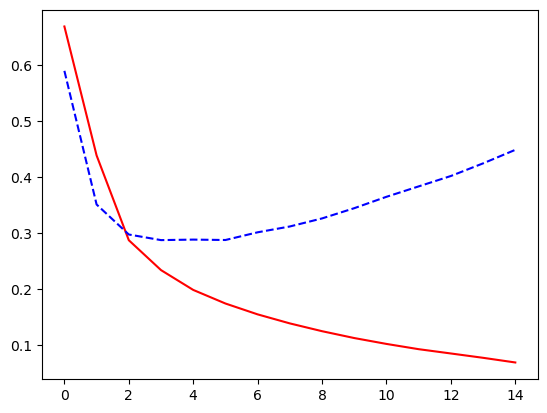

In [26]:
plt.plot(history.epoch, history.history['loss'], 'r') #x轴是epoch训练次数，y轴是loss 用red红色显示
plt.plot(history.epoch, history.history['val_loss'], 'b--')

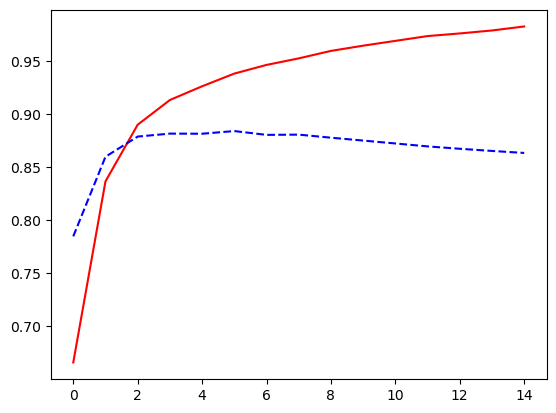

In [27]:
plt.plot(history.epoch, history.history['acc'], 'r') #x轴是epoch训练次数，y轴是acc 用red红色显示
plt.plot(history.epoch, history.history['val_acc'], 'b--')

In [28]:
#解决过拟合问题 ： 1. dropout  2.l2, l1 正则 （控制模型复杂度）